In [1]:
import numpy as np
import copy
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
np.random.seed(2095)

In [2]:
data = pd.read_csv('diabetes_nhanes.csv')
data

,Unnamed: 0,ALQ120Q,BMXBMI,BMXHT,BMXLEG,BMXWAIST,BMXWT,BPQ020,DMDEDUC2,INDHHINC,LBXTC,MCQ250A,PAQ180,RIAGENDR,RIDAGEYR,RIDRETH1,SMD030,status
0,0,1.0,19.9,162.4,39.6,74.4,52.5,2.0,1.0,8.0,179.0,2.0,2.0,2.0,31.0,1.0,NaN,0
1,1,4.0,30.2,158.6,41.0,97.4,76.0,1.0,3.0,5.0,221.0,2.0,2.0,2.0,49.0,4.0,NaN,0
2,2,2.0,27.9,169.0,42.3,96.0,79.7,2.0,4.0,2.0,650.0,2.0,1.0,2.0,37.0,3.0,15.0,0
3,3,1.0,63.4,164.4,36.0,144.6,171.4,2.0,4.0,11.0,169.0,1.0,2.0,2.0,32.0,4.0,20.0,0
4,4,4.0,27.0,175.3,42.8,99.4,82.9,1.0,3.0,4.0,254.0,1.0,2.0,2.0,59.0,3.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5510,1098,5.0,27.7,186.5,47.0,112.3,96.5,1.0,2.0,6.0,209.0,2.0,4.0,1.0,72.0,3.0,17.0,0
5511,1099,0.0,34.7,170.1,41.9,118.3,100.3,1.0,4.0,9.0,174.0,2.0,1.0,1.0,85.0,3.0,NaN,0
5512,1100,18.0,20.8,156.2,37.8,73.1,50.8,2.0,4.0,10.0,227.0,2.0,2.0,2.0,45.0,3.0,NaN,0
5513,1101,0.0,NaN,NaN,40.3,106.3,76.8,2.0,3.0,7.0,222.0,1.0,4.0,1.0,85.0,1.0,19.0,0


In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data


,ALQ120Q,BMXBMI,BMXHT,BMXLEG,BMXWAIST,BMXWT,BPQ020,DMDEDUC2,INDHHINC,LBXTC,MCQ250A,PAQ180,RIAGENDR,RIDAGEYR,RIDRETH1,SMD030,status
0,1.0,19.9,162.4,39.6,74.4,52.5,2.0,1.0,8.0,179.0,2.0,2.0,2.0,31.0,1.0,NaN,0
1,4.0,30.2,158.6,41.0,97.4,76.0,1.0,3.0,5.0,221.0,2.0,2.0,2.0,49.0,4.0,NaN,0
2,2.0,27.9,169.0,42.3,96.0,79.7,2.0,4.0,2.0,650.0,2.0,1.0,2.0,37.0,3.0,15.0,0
3,1.0,63.4,164.4,36.0,144.6,171.4,2.0,4.0,11.0,169.0,1.0,2.0,2.0,32.0,4.0,20.0,0
4,4.0,27.0,175.3,42.8,99.4,82.9,1.0,3.0,4.0,254.0,1.0,2.0,2.0,59.0,3.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5510,5.0,27.7,186.5,47.0,112.3,96.5,1.0,2.0,6.0,209.0,2.0,4.0,1.0,72.0,3.0,17.0,0
5511,0.0,34.7,170.1,41.9,118.3,100.3,1.0,4.0,9.0,174.0,2.0,1.0,1.0,85.0,3.0,NaN,0
5512,18.0,20.8,156.2,37.8,73.1,50.8,2.0,4.0,10.0,227.0,2.0,2.0,2.0,45.0,3.0,NaN,0
5513,0.0,NaN,NaN,40.3,106.3,76.8,2.0,3.0,7.0,222.0,1.0,4.0,1.0,85.0,1.0,19.0,0


In [4]:
data.columns = ['ALC','BMI','HEIGHT','LEG','WAIST','WEIGHT','HBP','EDU','INCOME','CHOL','REL','EXER','GEND','AGE','RACE','SMOKE','STATUS']

In [5]:
data["STATUS"].value_counts()

0    4466
1    1049
Name: STATUS, dtype: int64

In [6]:
data.shape

(5515, 17)

In [7]:
data.columns

Index(['ALC', 'BMI', 'HEIGHT', 'LEG', 'WAIST', 'WEIGHT', 'HBP', 'EDU',
       'INCOME', 'CHOL', 'REL', 'EXER', 'GEND', 'AGE', 'RACE', 'SMOKE',
       'STATUS'],
      dtype='object')

In [8]:
data.isnull().sum()

ALC        909
BMI        122
HEIGHT      93
LEG        170
WAIST      155
WEIGHT      81
HBP         56
EDU          0
INCOME     517
CHOL       107
REL          0
EXER         0
GEND         0
AGE          0
RACE         0
SMOKE     2595
STATUS       0
dtype: int64

In [9]:
# drop SMD030 column
data.drop(['SMOKE'], axis=1, inplace=True)
data

,ALC,BMI,HEIGHT,LEG,WAIST,WEIGHT,HBP,EDU,INCOME,CHOL,REL,EXER,GEND,AGE,RACE,STATUS
0,1.0,19.9,162.4,39.6,74.4,52.5,2.0,1.0,8.0,179.0,2.0,2.0,2.0,31.0,1.0,0
1,4.0,30.2,158.6,41.0,97.4,76.0,1.0,3.0,5.0,221.0,2.0,2.0,2.0,49.0,4.0,0
2,2.0,27.9,169.0,42.3,96.0,79.7,2.0,4.0,2.0,650.0,2.0,1.0,2.0,37.0,3.0,0
3,1.0,63.4,164.4,36.0,144.6,171.4,2.0,4.0,11.0,169.0,1.0,2.0,2.0,32.0,4.0,0
4,4.0,27.0,175.3,42.8,99.4,82.9,1.0,3.0,4.0,254.0,1.0,2.0,2.0,59.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5510,5.0,27.7,186.5,47.0,112.3,96.5,1.0,2.0,6.0,209.0,2.0,4.0,1.0,72.0,3.0,0
5511,0.0,34.7,170.1,41.9,118.3,100.3,1.0,4.0,9.0,174.0,2.0,1.0,1.0,85.0,3.0,0
5512,18.0,20.8,156.2,37.8,73.1,50.8,2.0,4.0,10.0,227.0,2.0,2.0,2.0,45.0,3.0,0
5513,0.0,NaN,NaN,40.3,106.3,76.8,2.0,3.0,7.0,222.0,1.0,4.0,1.0,85.0,1.0,0


In [10]:
# drop null values
data = data.dropna()

In [11]:
data.isnull().sum()

ALC       0
BMI       0
HEIGHT    0
LEG       0
WAIST     0
WEIGHT    0
HBP       0
EDU       0
INCOME    0
CHOL      0
REL       0
EXER      0
GEND      0
AGE       0
RACE      0
STATUS    0
dtype: int64

In [12]:
data.shape

(3965, 16)

<AxesSubplot:xlabel='STATUS', ylabel='count'>

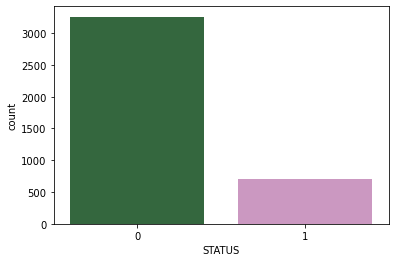

In [13]:
import seaborn as sns
sns.countplot(x ='STATUS', data = data, palette='cubehelix')

In [14]:
data.corr()

,ALC,BMI,HEIGHT,LEG,WAIST,WEIGHT,HBP,EDU,INCOME,CHOL,REL,EXER,GEND,AGE,RACE,STATUS
ALC,1.000000,0.002054,0.037826,0.009721,0.025873,0.020588,-0.001681,-0.005932,-0.006594,0.008625,0.043417,0.029908,-0.045247,0.038935,0.014607,0.021668
BMI,0.002054,1.000000,-0.038983,-0.043854,0.871320,0.876704,-0.224167,-0.027277,-0.023765,0.051139,-0.096507,-0.092495,0.062751,0.035629,0.010157,0.166519
HEIGHT,0.037826,-0.038983,1.000000,0.718703,0.228584,0.435061,-0.018418,0.154821,0.042551,-0.018923,0.019612,0.077363,-0.586943,0.049783,0.205523,0.005267
LEG,0.009721,-0.043854,0.718703,1.000000,0.084793,0.299849,0.049801,0.143644,0.049721,-0.024439,0.011424,0.088142,-0.382458,-0.127885,0.233810,-0.101599
WAIST,0.025873,0.871320,0.228584,0.084793,1.000000,0.894660,-0.297995,-0.071866,-0.049253,0.079686,-0.069017,-0.103837,-0.214016,0.275814,-0.001409,0.261831
WEIGHT,0.020588,0.876704,0.435061,0.299849,0.894660,1.000000,-0.207912,0.050002,0.006420,0.039781,-0.076032,-0.047364,-0.220361,0.054598,0.107088,0.151169
HBP,-0.001681,-0.224167,-0.018418,0.049801,-0.297995,-0.207912,1.000000,0.068974,0.043870,-0.031174,0.026335,0.102000,0.097233,-0.337680,-0.064384,-0.261327
EDU,-0.005932,-0.027277,0.154821,0.143644,-0.071866,0.050002,0.068974,1.000000,0.178233,-0.033588,-0.004937,-0.060420,0.122138,-0.126867,0.313743,-0.131812
INCOME,-0.006594,-0.023765,0.042551,0.049721,-0.049253,0.006420,0.043870,0.178233,1.000000,-0.013777,-0.006989,0.002110,0.027488,-0.063801,0.032164,-0.069305
CHOL,0.008625,0.051139,-0.018923,-0.024439,0.079686,0.039781,-0.031174,-0.033588,-0.013777,1.000000,0.016290,0.003237,-0.013501,0.110032,-0.008776,0.029158


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 0 to 5512
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALC     3965 non-null   float64
 1   BMI     3965 non-null   float64
 2   HEIGHT  3965 non-null   float64
 3   LEG     3965 non-null   float64
 4   WAIST   3965 non-null   float64
 5   WEIGHT  3965 non-null   float64
 6   HBP     3965 non-null   float64
 7   EDU     3965 non-null   float64
 8   INCOME  3965 non-null   float64
 9   CHOL    3965 non-null   float64
 10  REL     3965 non-null   float64
 11  EXER    3965 non-null   float64
 12  GEND    3965 non-null   float64
 13  AGE     3965 non-null   float64
 14  RACE    3965 non-null   float64
 15  STATUS  3965 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 686.6 KB


In [16]:
data = data.astype(float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 0 to 5512
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALC     3965 non-null   float64
 1   BMI     3965 non-null   float64
 2   HEIGHT  3965 non-null   float64
 3   LEG     3965 non-null   float64
 4   WAIST   3965 non-null   float64
 5   WEIGHT  3965 non-null   float64
 6   HBP     3965 non-null   float64
 7   EDU     3965 non-null   float64
 8   INCOME  3965 non-null   float64
 9   CHOL    3965 non-null   float64
 10  REL     3965 non-null   float64
 11  EXER    3965 non-null   float64
 12  GEND    3965 non-null   float64
 13  AGE     3965 non-null   float64
 14  RACE    3965 non-null   float64
 15  STATUS  3965 non-null   float64
dtypes: float64(16)
memory usage: 686.6 KB


<AxesSubplot:>

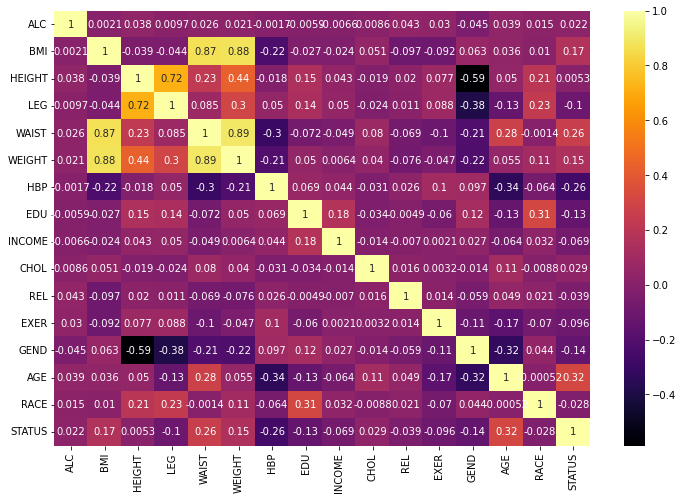

In [18]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(),cmap='inferno', annot=True)

(0.0, 800.0)

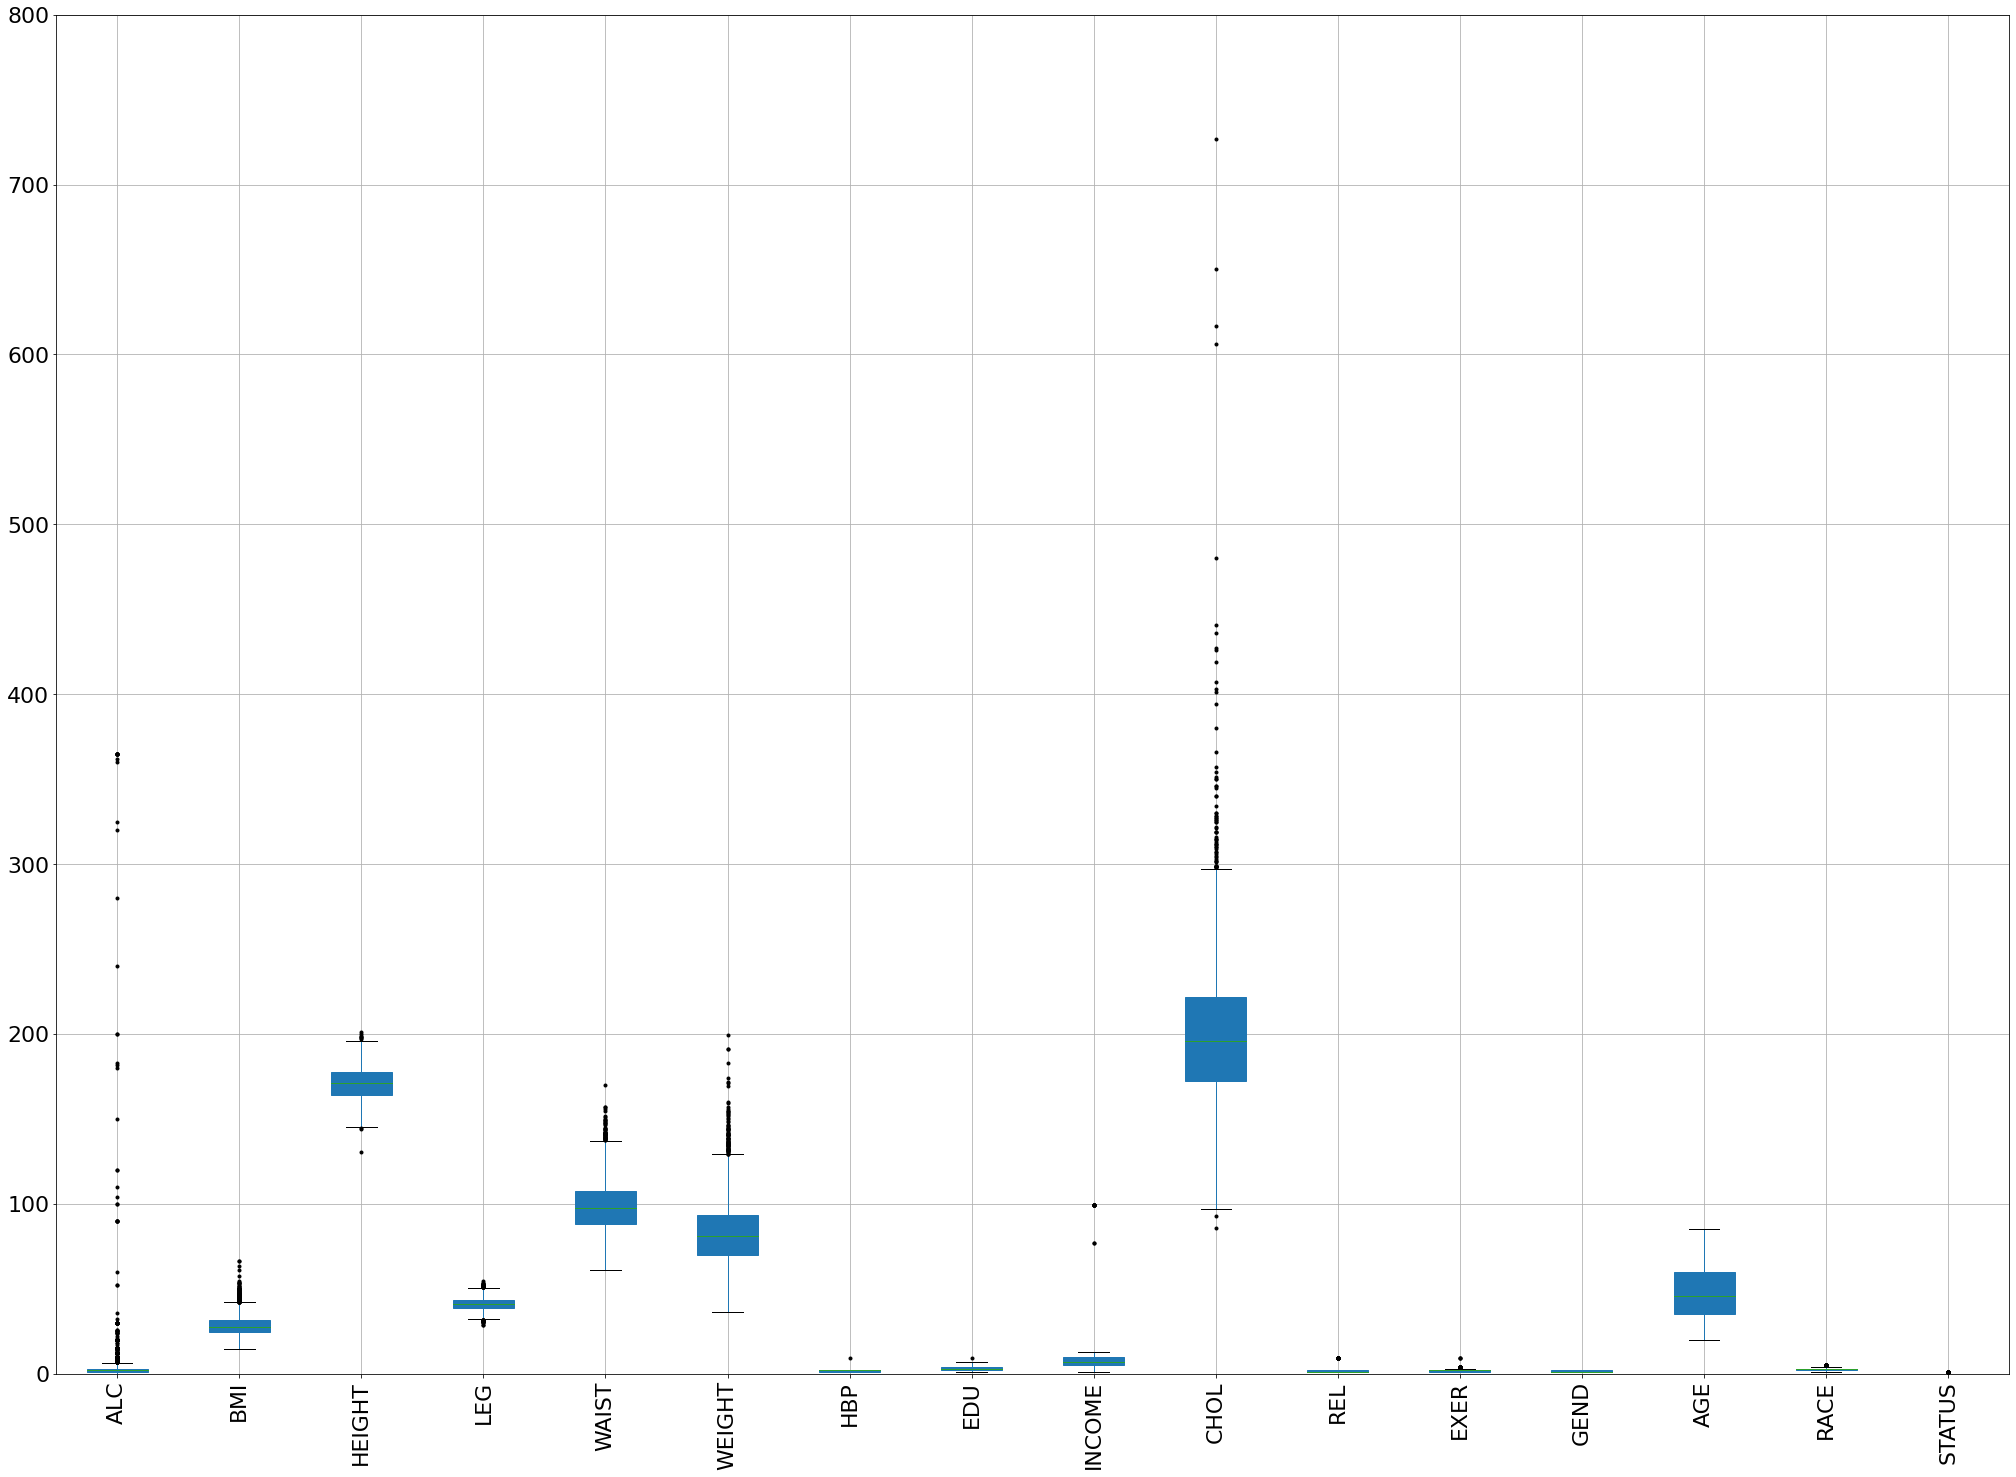

In [19]:
plt.subplots(figsize=(35,25))
data.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90,fontsize=22)#fontsize increased
plt.yticks(fontsize=22)
plt.ylim(0,800)

In [20]:
minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [21]:
def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the median value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

# taking all the columns except the last one
# last column is the label

X = data.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-02173f10b8ff>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] < minimum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

In [22]:
X = data.iloc[:, :-1]


In [23]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

ALC Contains Outlier
BMI Contains Outlier
LEG Contains Outlier
WAIST Contains Outlier
WEIGHT Contains Outlier
CHOL Contains Outlier


In [24]:
for i in range (50):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-02173f10b8ff>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] < minimum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-02173f10b8ff>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] < minimum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-02173f10b8ff>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] > maximum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-02173f10b8ff>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] < minimum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-02173f10b8ff>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] < minimum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-02173f10b8ff>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] > maximum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-02173f10b8ff>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] > maximum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-02173f10b8ff>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] > maximum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-02173f10b8ff>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[feature] > maximum, feature] = median
/usr/lib/python3/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inpu

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'ALC'),
  Text(2, 0, 'BMI'),
  Text(3, 0, 'HEIGHT'),
  Text(4, 0, 'LEG'),
  Text(5, 0, 'WAIST'),
  Text(6, 0, 'WEIGHT'),
  Text(7, 0, 'HBP'),
  Text(8, 0, 'EDU'),
  Text(9, 0, 'INCOME'),
  Text(10, 0, 'CHOL'),
  Text(11, 0, 'REL'),
  Text(12, 0, 'EXER'),
  Text(13, 0, 'GEND'),
  Text(14, 0, 'AGE'),
  Text(15, 0, 'RACE')])

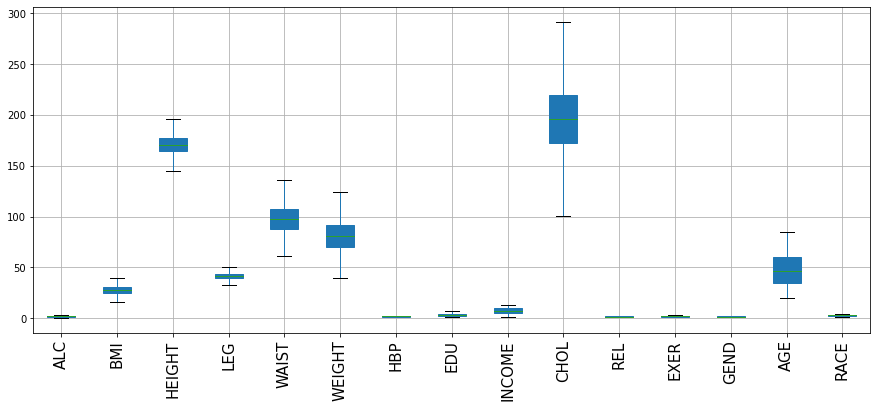

In [25]:
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90,fontsize=15)#fontsize increased



In [26]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()


,ALC,BMI,HEIGHT,LEG,WAIST,WEIGHT,HBP,EDU,INCOME,CHOL,REL,EXER,GEND,AGE,RACE
0,-0.409048,-1.682319,-0.914649,-0.472594,-1.655359,-1.783799,0.670221,-1.690615,0.261635,-0.477348,1.093927,0.170578,1.444162,-1.014072,-1.670644
1,0.627956,0.596411,-1.330486,-0.056153,-0.031021,-0.320499,-1.492046,-0.177628,-0.747818,0.683774,1.093927,0.170578,1.444162,0.056079,1.297588
2,0.627956,0.087568,-0.192405,0.330542,-0.129894,-0.090107,0.670221,0.578865,-1.757271,-0.007370,1.093927,-1.435933,1.444162,-0.657355,0.308177
3,-0.409048,-0.000926,-0.695787,-1.543443,-0.016896,-0.015386,0.670221,0.578865,1.271087,-0.753805,-0.914138,0.170578,1.444162,-0.954619,1.297588
4,0.627956,-0.111544,0.497009,0.479271,0.110226,0.109151,-1.492046,-0.177628,-1.084302,1.596084,-0.914138,0.170578,1.444162,0.650608,0.308177


In [29]:
label = data["STATUS"]

In [30]:
encoder = LabelEncoder()
label = encoder.fit_transform(label)

In [31]:
X = scaled_df
y = label 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [32]:
print(X_train.shape, y_test.shape)
print(y_train.shape, y_test.shape)

(3172, 15) (793,)
(3172,) (793,)


In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

xnew2=SelectKBest(f_classif, k=15).fit_transform(X, y)

In [34]:
 import sklearn.feature_selection as fs
 import matplotlib.pyplot as plt
 df2 = fs.SelectKBest(k='all')

 df2.fit(X, y)

 names = X.columns.values[df2.get_support()]

 scores = df2.scores_[df2.get_support()]

 names_scores = list(zip(names, scores))

 ns_df = pd.DataFrame(data = names_scores, columns=

  ['Features','F_Scores'])

 ns_df_sorted = ns_df.sort_values(['F_Scores','Features'], ascending =

  [False, True])

 print(ns_df_sorted)

   Features    F_Scores
13      AGE  438.311748
6       HBP  330.928042
4     WAIST  271.588516
10      REL  142.584814
0       ALC  115.102552
8    INCOME   87.860788
1       BMI   83.949429
5    WEIGHT   78.764426
12     GEND   78.712102
7       EDU   69.836229
3       LEG   36.401140
11     EXER   31.529101
14     RACE    6.233169
9      CHOL    0.534434
2    HEIGHT    0.361901


In [35]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices
logit_model = sm.OLS(y_train, X_train)
result = logit_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.172    
Dependent Variable:     y                AIC:                         3039.0712
Date:                   2022-05-29 00:57 BIC:                         3130.0030
No. Observations:       3172             Log-Likelihood:              -1504.5  
Df Model:               15               F-statistic:                 44.96    
Df Residuals:           3157             Prob (F-statistic):          8.16e-121
R-squared (uncentered): 0.176            Scale:                       0.15190  
------------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
ALC         -0.0317        0.0072      -4.4184      0.0000      -0.0458      -0.0177
BMI         -0.0167        0.0138      -1.21

In [36]:
#np.exp(result.params)


In [37]:
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params.sort_index()
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

              5%       95%  Odds Ratio
ALC     0.955203  0.982498    0.968754
BMI     0.957216  1.010365    0.983432
HEIGHT  0.987181  1.038314    1.012424
LEG     0.947320  0.985347    0.966147
WAIST   1.040728  1.105360    1.072557
WEIGHT  0.953183  1.018676    0.985385
HBP     0.932769  0.961283    0.946919
EDU     0.969786  1.001019    0.985279
INCOME  0.955568  0.984926    0.970136
CHOL    0.977545  1.004700    0.991029
REL     0.920814  0.946588    0.933612
EXER    0.975102  1.002293    0.988604
GEND    0.959139  0.996454    0.977618
AGE     1.046925  1.083699    1.065153
RACE    0.975879  1.005738    0.990696


In [38]:
#result.pvalues.sort_values()


In [39]:
#from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced',
                                                # np.unique(y_train),
                                                # y_train)
#model.fit(X_train, y_train, class_weight=class_weights)


# GLM

In [40]:
glm_binom = sm.GLM(y_train, X_train, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3172
Model:                            GLM   Df Residuals:                     3157
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1989.3
Date:                Sun, 29 May 2022   Deviance:                       3978.5
Time:                        00:57:31   Pearson chi2:                 3.21e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.3512
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ALC           -0.1311      0.039     -3.332      0.0

In [41]:
params1 = res.params
conf1 = res.conf_int()
conf1['Odds Ratio'] = params1
conf1.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf1))

              5%       95%  Odds Ratio
ALC     0.811987  0.947446    0.877105
BMI     0.797542  1.077060    0.926822
HEIGHT  0.942417  1.243541    1.082559
LEG     0.737131  0.915695    0.821576
WAIST   1.103534  1.540556    1.303862
WEIGHT  0.793548  1.144383    0.952954
HBP     0.721393  0.849753    0.782947
EDU     0.857089  1.020088    0.935043
INCOME  0.821243  0.968788    0.891970
CHOL    0.854077  0.993805    0.921296
REL     0.683461  0.795352    0.737287
EXER    0.874008  1.016514    0.942571
GEND    0.817672  1.007325    0.907558
AGE     1.233344  1.490546    1.355860
RACE    0.918623  1.083650    0.997731


In [42]:
X

,ALC,BMI,HEIGHT,LEG,WAIST,WEIGHT,HBP,EDU,INCOME,CHOL,REL,EXER,GEND,AGE,RACE
0,-0.409048,-1.682319,-0.914649,-0.472594,-1.655359,-1.783799,0.670221,-1.690615,0.261635,-0.477348,1.093927,0.170578,1.444162,-1.014072,-1.670644
1,0.627956,0.596411,-1.330486,-0.056153,-0.031021,-0.320499,-1.492046,-0.177628,-0.747818,0.683774,1.093927,0.170578,1.444162,0.056079,1.297588
2,0.627956,0.087568,-0.192405,0.330542,-0.129894,-0.090107,0.670221,0.578865,-1.757271,-0.007370,1.093927,-1.435933,1.444162,-0.657355,0.308177
3,-0.409048,-0.000926,-0.695787,-1.543443,-0.016896,-0.015386,0.670221,0.578865,1.271087,-0.753805,-0.914138,0.170578,1.444162,-0.954619,1.297588
4,0.627956,-0.111544,0.497009,0.479271,0.110226,0.109151,-1.492046,-0.177628,-1.084302,1.596084,-0.914138,0.170578,1.444162,0.650608,0.308177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,-1.446052,0.043321,-0.422210,-0.145391,0.682275,-0.245778,0.670221,-1.690615,-1.420787,-0.919680,-0.914138,-1.435933,-0.692443,1.780212,0.308177
3961,-1.446052,0.950388,-2.599884,-2.197851,0.548091,-0.768829,-1.492046,-0.177628,-1.757271,1.209043,1.093927,-1.435933,1.444162,-0.181732,0.308177
3962,0.627956,0.043321,1.722635,1.728595,1.021267,0.955996,-1.492046,-0.934122,-0.411334,0.352025,1.093927,0.170578,-0.692443,1.423495,0.308177
3963,-1.446052,1.591973,-0.072031,0.211559,1.445008,1.192615,-1.492046,0.578865,0.598119,-0.615577,1.093927,-1.435933,-0.692443,2.196382,0.308177


In [43]:
y

array([0, 0, 0, ..., 0, 0, 0])

Best parameters : {'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


<AxesSubplot:xlabel='weight'>

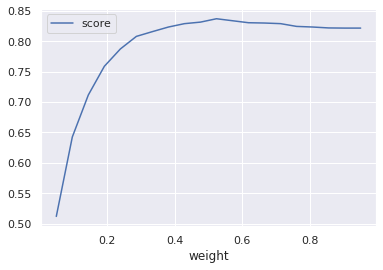

In [44]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='accuracy',
    cv=15
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [45]:
class_weight = {0: 0.5236842105263158,
                1: 0.47631578947368425}

In [46]:
#clf = LogisticRegression(**grid_result.best_params_).fit(X_train, y_train)

In [47]:
#Y_Test_Pred = clf.predict(X_test)

In [48]:
#pd.crosstab(Y_Test_Pred, y_test[label], rownames=['Predicted'], colnames=['Actual'])

In [49]:
#generate_model_report(Y_test, Y_Test_Pred)

In [50]:
#sns.countplot(x ='weight', data = dataz, palette='cubehelix')

In [51]:
#LR

In [52]:

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# rd = RandomForestClassifier(class_weight='balanced',random_state=4200)
# rd.fit(X_train,y_train)
# y_pred_rd = rd.predict(X_test)


# import matplotlib.pyplot as plt
# cm = confusion_matrix(y_test,y_pred_rd)

# #plt.figure(figsize=(5,5))
# #sns.heatmap(cm,annot=True,linewidths=.3)
# #plt.show()

# print(classification_report(y_test,y_pred_rd))
# plot_confusion_matrix(confusion_matrix(y_test, y_pred_rd))

# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rd)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# roc_auc


In [53]:
#CV appraoach

## SVM

In [54]:

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# create model
model = SVC(kernel='rbf', C=1, class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.8309 (0.0077)


array([0.83606557, 0.81336696, 0.83984868, 0.8297604 , 0.83354351,
       0.84110971, 0.82849937, 0.82345523, 0.83354351, 0.8297604 ])

/home/user/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/user/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/user/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will

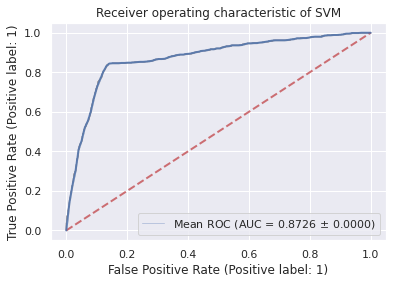

In [88]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold



# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
classifier = svm.SVC(kernel='rbf', probability=True, class_weight=class_weight,
                     random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X, y)
    viz = plot_roc_curve(classifier, X, y,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of SVM")
ax.legend([r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc)],loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       668
           1       0.36      0.74      0.48       125

    accuracy                           0.75       793
   macro avg       0.65      0.74      0.66       793
weighted avg       0.85      0.75      0.78       793



0.7444970059880239

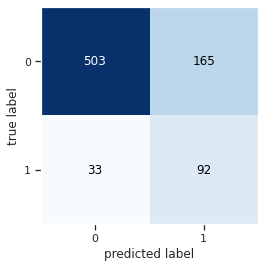

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf_svc_rbf = SVC(kernel="rbf",class_weight='balanced',random_state=4200)
clf_svc_rbf.fit(X_train,y_train)
y_pred_clf_svc_rbf = clf_svc_rbf.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_clf_svc_rbf)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True)
#plt.show()

#print(classification_report(y_test,y_pred_clf_svc_rbf))

print(classification_report(y_test, y_pred_clf_svc_rbf))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_clf_svc_rbf))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf_svc_rbf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


# LR

In [63]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# create model
model = LogisticRegression(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.8347 (0.0058)


array([0.83354351, 0.8221942 , 0.83606557, 0.83480454, 0.83984868,
       0.84237074, 0.83858764, 0.83354351, 0.82723834, 0.83858764])

/home/user/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/user/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/user/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will

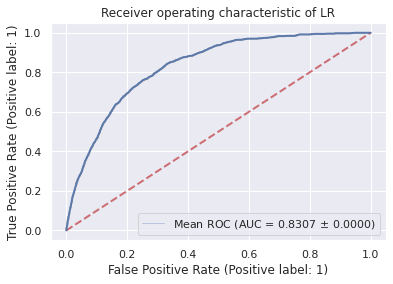

In [89]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#X, y = X[y != 2], y[y != 2]
#n_samples, n_features = X.shape

# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
classifier = LogisticRegression(class_weight=class_weight,random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X, y)
    viz = plot_roc_curve(classifier, X, y,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of LR")
ax.legend([r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc)],loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       668
           1       0.35      0.74      0.48       125

    accuracy                           0.74       793
   macro avg       0.65      0.74      0.65       793
weighted avg       0.85      0.74      0.77       793



0.7432574850299402

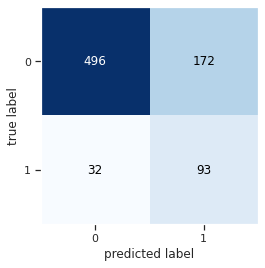

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt
lr = LogisticRegression(class_weight='balanced',random_state=420)

# Fit..
lr.fit(X_train, y_train)

# Predict..
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


## RF

In [67]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import ShuffleSplit

# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# create model
model = RandomForestClassifier(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.8155 (0.0077)


array([0.82093317, 0.80958386, 0.8221942 , 0.81210593, 0.81462799,
       0.8259773 , 0.8259773 , 0.80580076, 0.81462799, 0.80327869])

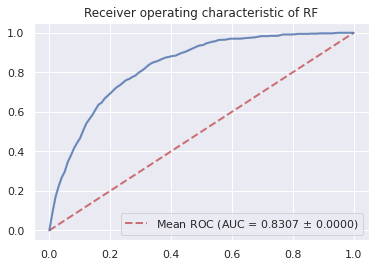

In [90]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#X, y = X[y != 2], y[y != 2]
#n_samples, n_features = X.shape

# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(class_weight=class_weight,random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X, y)
    #viz = plot_roc_curve(classifier, X, y,
                  #       name='ROC fold {}'.format(i),
                    #     alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of RF")
ax.legend([r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc)],loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       668
           1       0.37      0.18      0.25       125

    accuracy                           0.82       793
   macro avg       0.62      0.56      0.57       793
weighted avg       0.78      0.82      0.80       793



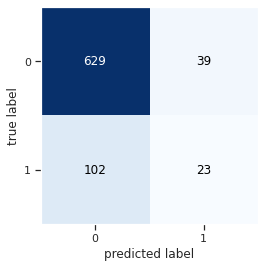

In [69]:


clf_svc_rbf =  RandomForestClassifier(class_weight=class_weight)
clf_svc_rbf.fit(X_train,y_train)
y_pred_clf_svc_rbf = clf_svc_rbf.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_clf_svc_rbf)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True)
#plt.show()

#print(classification_report(y_test,y_pred_clf_svc_rbf))

print(classification_report(y_test, y_pred_clf_svc_rbf))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_clf_svc_rbf))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf_svc_rbf)
roc_auc = auc(false_positive_rate, true_positive_rate)
# roc_auc

## DT

In [70]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# create model
model = DecisionTreeClassifier(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.7564 (0.0106)


array([0.75283733, 0.75662043, 0.74148802, 0.75283733, 0.7704918 ,
       0.76544767, 0.77301387, 0.74779319, 0.76166456, 0.74148802])

/home/user/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/user/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/user/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will

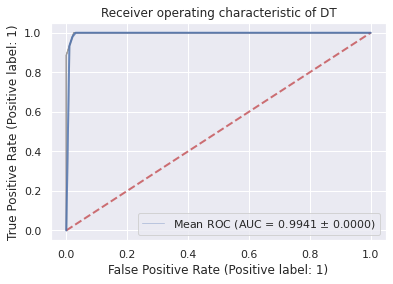

In [91]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#X, y = X[y != 2], y[y != 2]
#n_samples, n_features = X.shape

# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
classifier = DecisionTreeClassifier(class_weight=class_weight,random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X, y)
    viz = plot_roc_curve(classifier, X, y,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of DT")
ax.legend([r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc)],loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       668
           1       0.22      0.25      0.23       125

    accuracy                           0.74       793
   macro avg       0.54      0.54      0.54       793
weighted avg       0.76      0.74      0.75       793



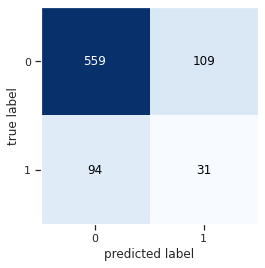

In [72]:

clf_svc_rbf = DecisionTreeClassifier(class_weight=class_weight)
clf_svc_rbf.fit(X_train,y_train)
y_pred_clf_svc_rbf = clf_svc_rbf.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_clf_svc_rbf)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True)
#plt.show()

#print(classification_report(y_test,y_pred_clf_svc_rbf))

print(classification_report(y_test, y_pred_clf_svc_rbf))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_clf_svc_rbf))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf_svc_rbf)
roc_auc = auc(false_positive_rate, true_positive_rate)
# roc_auc

In [73]:
#from sklearn.model_selection import cross_val_score
#from sklearn import svm
#clf = svm.SVC(kernel='rbf', C=1, class_weight=class_weight)
#scores = cross_val_score(clf, X, y, cv=5)
#print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

#clf.score(X_test, y_test)

## ANN

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [78]:
classifier=Sequential()
classifier.add(Dense(units=256,activation='sigmoid',input_dim=15))
classifier.add(Dense(units=128, activation='sigmoid'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=64,activation='sigmoid'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=32,activation='sigmoid'))


classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=10,epochs=100,class_weight=class_weight,validation_data=(X_test, y_test))

Epoch 1/100
318/318 [==============================] - 1s 1ms/step - loss: 0.2325 - accuracy: 0.8108 - val_loss: 0.3663 - val_accuracy: 0.8424
Epoch 2/100
318/318 [==============================] - 0s 842us/step - loss: 0.1901 - accuracy: 0.8241 - val_loss: 0.3504 - val_accuracy: 0.8499
Epoch 3/100
318/318 [==============================] - 0s 847us/step - loss: 0.1862 - accuracy: 0.8250 - val_loss: 0.3486 - val_accuracy: 0.8512
Epoch 4/100
318/318 [==============================] - 0s 844us/step - loss: 0.1847 - accuracy: 0.8282 - val_loss: 0.3489 - val_accuracy: 0.8462
Epoch 5/100
318/318 [==============================] - 0s 845us/step - loss: 0.1830 - accuracy: 0.8269 - val_loss: 0.3478 - val_accuracy: 0.8411
Epoch 6/100
318/318 [==============================] - 0s 846us/step - loss: 0.1828 - accuracy: 0.8335 - val_loss: 0.3451 - val_accuracy: 0.8449
Epoch 7/100
318/318 [==============================] - 0s 850us/step - loss: 0.1810 - accuracy: 0.8326 - val_loss: 0.3464 - val_accu

In [77]:
# #clf_svc_rbf.fit(X_train,y_train)
# from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,auc,f1_score
# y_pred = classifier.predict(X_test)>0.9


# import matplotlib.pyplot as plt
# cm = confusion_matrix(y_test,y_pred)

# #plt.figure(figsize=(5,5))
# #sns.heatmap(cm,annot=True)
# #plt.show()

# #print(classification_report(y_test,y_pred_clf_svc_rbf))

# print(classification_report(y_test, y_pred))
# plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# #roc_auc




In [79]:
# Accuracy of ANN
classifier.evaluate(X_test,y_test )

25/25 [==============================] - 0s 553us/step - loss: 0.3856 - accuracy: 0.8222


[0.3856380879878998, 0.8221942186355591]

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       668
           1       0.42      0.36      0.39       125

    accuracy                           0.82       793
   macro avg       0.65      0.63      0.64       793
weighted avg       0.81      0.82      0.82       793



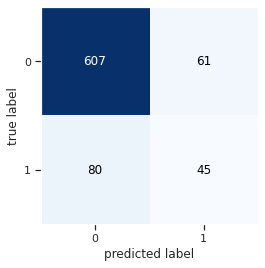

In [80]:
#clf_svc_rbf.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,auc,f1_score
y_pred = classifier.predict(X_test)

yPred = (y_pred>0.5).astype(int).flatten()


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,yPred)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True)
#plt.show()

#print(classification_report(y_test,y_pred_clf_svc_rbf))

print(classification_report(y_test, yPred))
plot_confusion_matrix(confusion_matrix(y_test, yPred))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
#roc_auc

AUC Score: 0.80088622754491


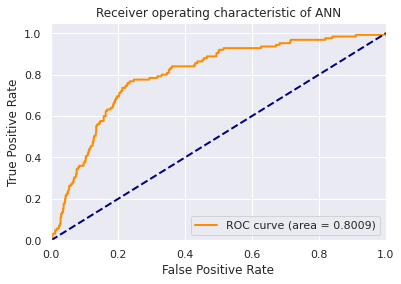

In [92]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

fpr , tpr , thresholds = roc_curve ( y_test , y_pred)
auc_keras = auc(fpr, tpr)
print("AUC Score:",auc_keras)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % auc_keras)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of ANN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#from sklearn.tree import DecisionTreeClassifier


#from sklearn.model_selection import cross_val_score

#dt = DecisionTreeClassifier(class_weight=class_weight)
#scores = cross_val_score(clf, X, y, cv=5)
#print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

In [ ]:
'''

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,auc,f1_score

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_logistic = lr.predict(X_test)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_logistic)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=.3)
plt.show()

print(classification_report(y_test,y_pred_logistic))


from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_logistic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
print(f1_score(y_test, y_pred_logistic,average="macro"))
'''

In [82]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [83]:
clf1 = SVC(kernel='rbf', C=1, class_weight=class_weight,random_state=42)
clf2 = LogisticRegression(class_weight=class_weight,random_state=42)
clf3 = RandomForestClassifier(class_weight=class_weight,random_state=42)
clf4 = DecisionTreeClassifier(class_weight=class_weight,random_state=42)
#clf5 = Sequential()

In [84]:
eclf = VotingClassifier( estimators=[('svm', clf1), ('lr', clf2), ('rf', clf3), ('dt',clf4)],
     voting='hard')

In [85]:
for clf, label in zip([clf1, clf2, clf3,clf4 ,eclf], ['SVM', 'LR', 'RF','DT', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))
scores

Accuracy: 0.8235 (+/- 0.0088) [Ensemble]


array([0.8186398 , 0.82871537, 0.82115869, 0.82619647, 0.82871537,
       0.83838384, 0.82828283, 0.8030303 , 0.82070707, 0.82070707])